# 提取数据子集

In [2]:
import keras
from keras.datasets import mnist

def get_datasub(num_per_class):
    '''数据加载：提取mnist数据子集
    @param num_per_class 每个子类提取样本数，最多6000
    @return (x_train,y_train),(x_test,y_test)
    
    使用范例：
        (x_train,y_train),(x_test,y_test)=get_datasub(100)
    '''
    #-------加载数据-------
    (x_train_all, y_train_all), (x_test, y_test) = mnist.load_data() #加载所有数据    
    #-------构造过拟合数据与模型------
    num_class=10              #分类数目
    #构造过拟合数据:每个分类十个,共100个样本
    x_train_all = x_train_all.reshape(60000, 784)   #修改shape
    x_test = x_test.reshape(10000, 784)             #修改shape
    x_train_all = x_train_all.astype('float32')     #修改类型
    x_test=x_test.astype('float32')                 #修改内容
    x_train_all /= 255                              #归一化
    x_test /= 255                                   #归一化
    x_train=np.empty(shape=(0,784),dtype=np.float32)#输出数组
    y_train=np.empty(shape=(0,),dtype=np.int32)     #输出数组
    #每类抽取前pick_num_per_class个数
    for j in range(num_class):
        x_train=np.vstack((x_train,x_train_all[np.where(y_train_all==j)[0][:num_per_class],:]))
        y_train=np.append(y_train,y_train_all[np.where(y_train_all==j)[0][:num_per_class]])    
    #重新打乱数据    
    index=np.random.permutation(len(y_train)) #随机生成一个乱序数组:参数为n，返回[0,n)的乱序
    x_train=x_train[index,:]
    y_train=y_train[index]
    #one-hot处理
    y_train = keras.utils.to_categorical(y_train, num_class)
    y_test = keras.utils.to_categorical(y_test, num_class)
    
    return (x_train,y_train),(x_test,y_test)

In [3]:
(x_train,y_train),(x_test,y_test)=get_datasub(10)
print('x_train.shape:',x_train.shape)
print('y_train.shape:',y_train.shape)
print('x_test.shape:',x_test.shape)
print('y_test.shape:',y_test.shape)

x_train.shape: (100, 784)
y_train.shape: (100, 10)
x_test.shape: (10000, 784)
y_test.shape: (10000, 10)


# 绘制模型训练曲线函数
    绘制四条训练曲线：acc,loss,val_acc,val_loss

In [4]:
import matplotlib.pyplot as plt
#绘制训练曲线
def draw_train_curve(his,title=''):
    '''绘制训练曲线
    @param his   model.fit 或 model.fit_generator训练的返回值history
    @param title 显示标题
    
    使用范例:
        history=model.fit(...)
        draw_train_curve(history.history,'标题')
    '''
    #使用范例：draw_train_curve(history.history,'data')    
    plt.plot(his['loss'],label="loss")
    plt.plot(his['acc'],label='acc')
    plt.plot(his['val_loss'],label='val_loss')
    plt.plot(his['val_acc'],label='val_acc')
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()

# 固定模型，递增训练数据集大小，观察训练/测试结果曲线
* 数据集越大，训练精度会越高，但需要适配相应大小模型

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                15700     
_________________________________________________________________
dense_2 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                210       
Total params: 16,330
Trainable params: 16,330
Non-trainable params: 0
_________________________________________________________________
Test loss: 0.7904510684999637
Test accuracy: 0.8561


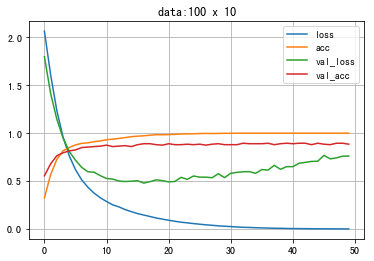

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 20)                15700     
_________________________________________________________________
dense_5 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                210       
Total params: 16,330
Trainable params: 16,330
Non-trainable params: 0
_________________________________________________________________
Test loss: 0.6833616682195105
Test accuracy: 0.8843


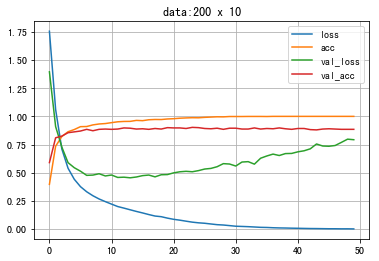

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 20)                15700     
_________________________________________________________________
dense_8 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_9 (Dense)              (None, 10)                210       
Total params: 16,330
Trainable params: 16,330
Non-trainable params: 0
_________________________________________________________________
Test loss: 0.5707653767843265
Test accuracy: 0.8986


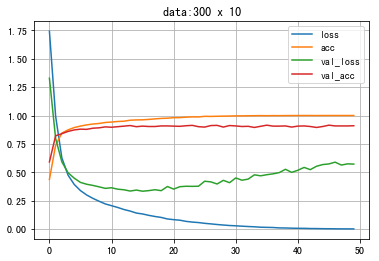

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 20)                15700     
_________________________________________________________________
dense_11 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_12 (Dense)             (None, 10)                210       
Total params: 16,330
Trainable params: 16,330
Non-trainable params: 0
_________________________________________________________________
Test loss: 0.5648098441169365
Test accuracy: 0.9001


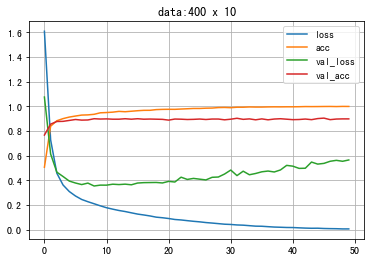

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 20)                15700     
_________________________________________________________________
dense_14 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_15 (Dense)             (None, 10)                210       
Total params: 16,330
Trainable params: 16,330
Non-trainable params: 0
_________________________________________________________________
Test loss: 0.5409084896473214
Test accuracy: 0.9032


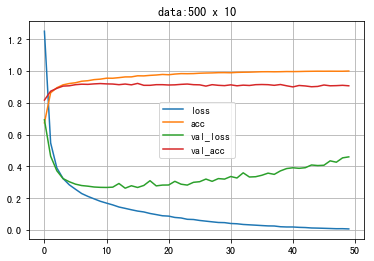

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 20)                15700     
_________________________________________________________________
dense_17 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_18 (Dense)             (None, 10)                210       
Total params: 16,330
Trainable params: 16,330
Non-trainable params: 0
_________________________________________________________________
Test loss: 0.5432205644465866
Test accuracy: 0.9105


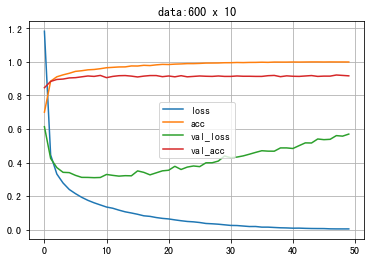

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 20)                15700     
_________________________________________________________________
dense_20 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_21 (Dense)             (None, 10)                210       
Total params: 16,330
Trainable params: 16,330
Non-trainable params: 0
_________________________________________________________________
Test loss: 0.48345003852868396
Test accuracy: 0.9199


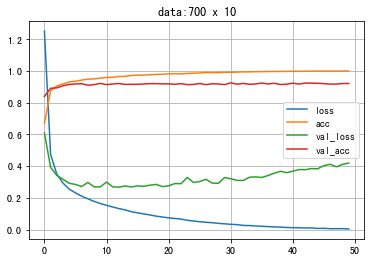

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 20)                15700     
_________________________________________________________________
dense_23 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_24 (Dense)             (None, 10)                210       
Total params: 16,330
Trainable params: 16,330
Non-trainable params: 0
_________________________________________________________________
Test loss: 0.44803090000513623
Test accuracy: 0.9231


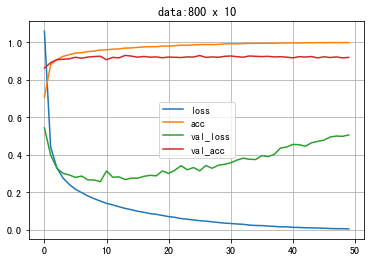

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 20)                15700     
_________________________________________________________________
dense_26 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_27 (Dense)             (None, 10)                210       
Total params: 16,330
Trainable params: 16,330
Non-trainable params: 0
_________________________________________________________________
Test loss: 0.48049294381804064
Test accuracy: 0.9156


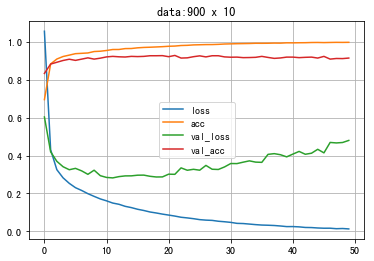

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 20)                15700     
_________________________________________________________________
dense_29 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_30 (Dense)             (None, 10)                210       
Total params: 16,330
Trainable params: 16,330
Non-trainable params: 0
_________________________________________________________________
Test loss: 0.4373422552429314
Test accuracy: 0.9262


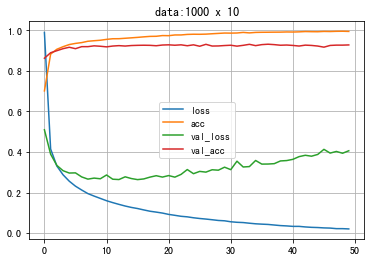

In [1]:
%matplotlib inline

import os
import numpy as np
import tensorflow as tf
import keras
from keras.datasets import mnist
from keras import models,layers,optimizers

for i in range(1,11):
    #-------加载数据-------
    (x_train_all, y_train_all), (x_test, y_test) = mnist.load_data() #加载所有数据    
    #-------构造过拟合数据与模型------
    num_class=10                                          #分类数目
    (x_train,y_train),(x_test,y_test)=get_datasub(100*i)  #获取数据子集

    #构造过拟合模型:模型参数 1024×1024×1024×10
    model = models.Sequential()
    model.add(layers.Dense(20, activation='relu', input_shape=(784,)))
    model.add(layers.Dense(20, activation='relu'))
    model.add(layers.Dense(num_class, activation='softmax'))
    #打印模型
    model.summary()
    #编译模型
    model.compile(loss='categorical_crossentropy',
                  optimizer='rmsprop',#optimizers.RMSprop(),
                  metrics=['accuracy'])
    #训练模型
    history = model.fit(x_train, y_train,
                        batch_size=32,
                        epochs=50,
                        verbose=0,
                        validation_split=0.2 #validation_data=(x_test, y_test)
                        )
    #模型估计
    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])

    #绘制训练曲线
    draw_train_curve(history.history,'data:%d x %d'%(i*100,num_class))

# 过拟合实验
    构造小数据，大模型
    
    实验结果分析：
        acc :快速接近1.0
        loss:快速走低，并持稳态

        val_loss:经过N次跌后出现波谷，后续训练降反升
        val_acc 与 acc出现明显差值。
        
        以上数据表明，模型存在过拟合现象！

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_56 (Dense)             (None, 1024)              803840    
_________________________________________________________________
dense_57 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_58 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_59 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_60 (Dense)             (None, 10)                10250     
Total params: 3,962,890
Trainable params: 3,962,890
Non-trainable params: 0
_________________________________________________________________
Train on 80 samples, validate on 20 samples
Epoch 1/100
80/80 [==============================] - 1s 9ms/step - loss: 3.0592 - acc: 0

80/80 [==============================] - 0s 246us/step - loss: 2.8387e-07 - acc: 1.0000 - val_loss: 1.2542 - val_acc: 0.8000
Epoch 54/100
80/80 [==============================] - 0s 256us/step - loss: 2.5854e-07 - acc: 1.0000 - val_loss: 1.2466 - val_acc: 0.8000
Epoch 55/100
80/80 [==============================] - 0s 202us/step - loss: 2.3767e-07 - acc: 1.0000 - val_loss: 1.2565 - val_acc: 0.8000
Epoch 56/100
80/80 [==============================] - 0s 249us/step - loss: 2.1160e-07 - acc: 1.0000 - val_loss: 1.2532 - val_acc: 0.8000
Epoch 57/100
80/80 [==============================] - 0s 257us/step - loss: 2.0340e-07 - acc: 1.0000 - val_loss: 1.2565 - val_acc: 0.8000
Epoch 58/100
80/80 [==============================] - 0s 268us/step - loss: 1.8328e-07 - acc: 1.0000 - val_loss: 1.2622 - val_acc: 0.8000
Epoch 59/100
80/80 [==============================] - 0s 257us/step - loss: 1.6987e-07 - acc: 1.0000 - val_loss: 1.2729 - val_acc: 0.8000
Epoch 60/100
80/80 [===========================

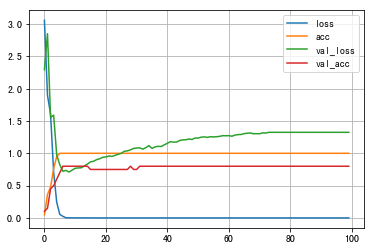

In [12]:
import os
import numpy as np
import tensorflow as tf
import keras
from keras.datasets import mnist
from keras import models,layers,optimizers

#-------加载数据-------
(x_train_all, y_train_all), (x_test, y_test) = mnist.load_data() #加载所有数据

#-------构造过拟合数据与模型------
num_class=10                                      #分类数目
(x_train,y_train),(x_test,y_test)=get_datasub(10) #获取数据子集

#构造过拟合模型:模型参数 1024×1024×1024×10
model = models.Sequential()
model.add(layers.Dense(1024, activation='relu', input_shape=(784,)))
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(num_class, activation='softmax'))
#打印模型
model.summary()
#编译模型
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',#optimizers.RMSprop(),
              metrics=['accuracy'])
#训练模型
history = model.fit(x_train, y_train,
                    batch_size=32,
                    epochs=100,
                    verbose=1,
                    validation_split=0.2 #validation_data=(x_test, y_test)
                    )
#模型估计
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#绘制训练曲线
draw_train_curve(history.history)

# 欠拟合实验
    构造大数据，小模型
    实验结果分析：
        acc :收敛速度慢
        
        由于模型容量小，不足以表达拟合数据，acc难以接近1.0

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_61 (Dense)             (None, 2)                 1570      
_________________________________________________________________
dense_62 (Dense)             (None, 10)                30        
Total params: 1,600
Trainable params: 1,600
Non-trainable params: 0
_________________________________________________________________
Train on 58862 samples, validate on 10000 samples
Epoch 1/100
58862/58862 [==============================] - 9s 145us/step - loss: 1.5973 - acc: 0.4234 - val_loss: 1.3474 - val_acc: 0.5109
Epoch 2/100
58862/58862 [==============================] - 8s 141us/step - loss: 1.2846 - acc: 0.5228 - val_loss: 1.2254 - val_acc: 0.5520
Epoch 3/100
58862/58862 [==============================] - 8s 139us/step - loss: 1.2041 - acc: 0.5620 - val_loss: 1.1741 - val_acc: 0.5750
Epoch 4/100
58862/58862 [==============================] - 8s 139us/s

Epoch 55/100
58862/58862 [==============================] - 8s 137us/step - loss: 0.9326 - acc: 0.7039 - val_loss: 0.9401 - val_acc: 0.7055
Epoch 56/100
58862/58862 [==============================] - 8s 138us/step - loss: 0.9320 - acc: 0.7045 - val_loss: 0.9402 - val_acc: 0.7059
Epoch 57/100
58862/58862 [==============================] - 8s 140us/step - loss: 0.9322 - acc: 0.7041 - val_loss: 0.9375 - val_acc: 0.7109
Epoch 58/100
58862/58862 [==============================] - 8s 139us/step - loss: 0.9321 - acc: 0.7046 - val_loss: 0.9416 - val_acc: 0.7068
Epoch 59/100
58862/58862 [==============================] - 8s 139us/step - loss: 0.9318 - acc: 0.7047 - val_loss: 0.9376 - val_acc: 0.7084
Epoch 60/100
58862/58862 [==============================] - 8s 137us/step - loss: 0.9320 - acc: 0.7043 - val_loss: 0.9365 - val_acc: 0.7086
Epoch 61/100
58862/58862 [==============================] - 8s 139us/step - loss: 0.9313 - acc: 0.7037 - val_loss: 0.9506 - val_acc: 0.7028
Epoch 62/100
58862/5

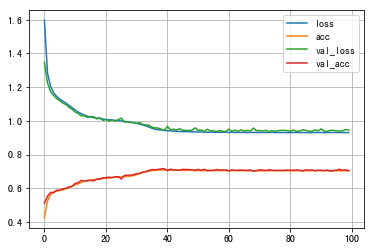

In [13]:
import os
import numpy as np
import tensorflow as tf
import keras
from keras.datasets import mnist
from keras import models,layers,optimizers

#-------加载数据-------
num_class=10  #分类数目
(x_train, y_train), (x_test, y_test) = get_datasub(6000) #加载所有数据

#构造欠拟合模型
model = models.Sequential()
model.add(layers.Dense(2, activation='relu', input_shape=(784,)))
model.add(layers.Dense(num_class, activation='softmax'))
#打印模型
model.summary()
#编译模型
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
#模型
history = model.fit(x_train, y_train,
                    batch_size=32,
                    epochs=100,
                    verbose=1,
                    validation_data=(x_test, y_test)
                    )
#模型估计
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#绘制训练曲线
draw_train_curve(history.history)

# 深层/浅层网络梯度消失现象
    相同数据集，分别构造深层/浅层网络，通过sigmoid激活函数观察梯度消失现象

In [ ]:
import os
import numpy as np
import tensorflow as tf
import keras
from keras.datasets import mnist
from keras import models,layers,optimizers

#-------加载数据-------
num_class=10  #分类数目
(x_train, y_train), (x_test, y_test) = get_datasub(6000)

#构造浅层网络
print('========浅层网络========')
model = models.Sequential()
model.add(layers.Dense(32, activation='sigmoid', input_shape=(784,)))
for i in range(2):
    model.add(layers.Dense(32, activation='sigmoid'))
model.add(layers.Dense(num_class, activation='softmax'))
#打印模型
model.summary()
#编译模型
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
#模型
history = model.fit(x_train, y_train,
                    batch_size=32,
                    epochs=100,
                    verbose=1,
                    validation_split=0.2
                    )
#模型估计
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
#绘制训练曲线
draw_train_curve(history.history,'浅层网络')

Test loss: 0.26801215899621667
Test accuracy: 0.9567


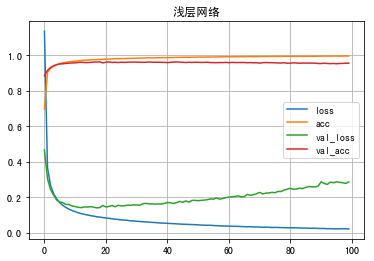

========深层网络========
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_6 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_7 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_8 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_9 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_10 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_11 (Dense)             (None, 32)                

47089/47089 [==============================] - 34s 723us/step - loss: 2.3043 - acc: 0.0994 - val_loss: 2.3030 - val_acc: 0.1020
Epoch 8/120
47089/47089 [==============================] - 35s 737us/step - loss: 2.3038 - acc: 0.1014 - val_loss: 2.3025 - val_acc: 0.1068
Epoch 9/120
47089/47089 [==============================] - 35s 738us/step - loss: 2.3038 - acc: 0.1001 - val_loss: 2.3039 - val_acc: 0.0984
Epoch 10/120
47089/47089 [==============================] - 35s 737us/step - loss: 2.3035 - acc: 0.1027 - val_loss: 2.3038 - val_acc: 0.1016
Epoch 11/120
47089/47089 [==============================] - 35s 735us/step - loss: 2.3036 - acc: 0.1019 - val_loss: 2.3027 - val_acc: 0.0988
Epoch 12/120
47089/47089 [==============================] - 35s 735us/step - loss: 2.3033 - acc: 0.0999 - val_loss: 2.3032 - val_acc: 0.1020
Epoch 13/120
47089/47089 [==============================] - 34s 730us/step - loss: 2.3031 - acc: 0.1008 - val_loss: 2.3030 - val_acc: 0.1005
Epoch 14/120
47089/47089 [==

47089/47089 [==============================] - 34s 732us/step - loss: 2.3025 - acc: 0.1004 - val_loss: 2.3021 - val_acc: 0.1068
Epoch 66/120
47089/47089 [==============================] - 34s 732us/step - loss: 2.3025 - acc: 0.1008 - val_loss: 2.3021 - val_acc: 0.1068
Epoch 67/120
47089/47089 [==============================] - 34s 729us/step - loss: 2.3025 - acc: 0.1011 - val_loss: 2.3021 - val_acc: 0.1068
Epoch 68/120
47089/47089 [==============================] - 35s 737us/step - loss: 2.3025 - acc: 0.0997 - val_loss: 2.3021 - val_acc: 0.1068
Epoch 69/120
47089/47089 [==============================] - 34s 732us/step - loss: 2.3025 - acc: 0.1001 - val_loss: 2.3023 - val_acc: 0.1020
Epoch 70/120
47089/47089 [==============================] - 34s 732us/step - loss: 2.3025 - acc: 0.1013 - val_loss: 2.3023 - val_acc: 0.0988
Epoch 71/120
47089/47089 [==============================] - 34s 727us/step - loss: 2.3024 - acc: 0.1015 - val_loss: 2.3024 - val_acc: 0.1016
Epoch 72/120
47089/47089 [

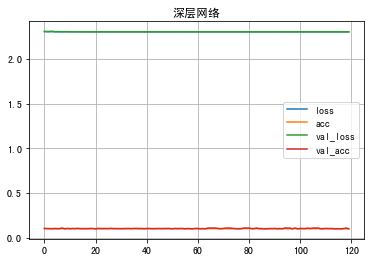

In [8]:
#构造深层网络
print('========深层网络========')
model = models.Sequential()
model.add(layers.Dense(32, activation='sigmoid', input_shape=(784,)))
for i in range(50):
    model.add(layers.Dense(32, activation='sigmoid'))
model.add(layers.Dense(num_class, activation='softmax'))
#打印模型
model.summary()
#编译模型
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
#模型
history = model.fit(x_train, y_train,
                    batch_size=32,
                    epochs=120,
                    verbose=1,
                    validation_split=0.2
                    )
#模型估计
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
#绘制训练曲线
draw_train_curve(history.history,'深层网络')


# 大小/小大/大小大/小大小结构网络训练观察

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_61 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_62 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 47089 samples, validate on 11773 samples
Epoch 1/20
47089/47089 [==============================] - 8s 165us/step - loss: 0.2103 - acc: 0.9368 - val_loss: 0.1366 - val_acc: 0.9640
Epoch 2/20
47089/47089 [==============================] - 7s 153us/step - loss: 0.1042 - acc: 0.9724 - val_loss: 0.1364 - val_acc: 0.9662
Epoch 3/20
47089/47089 [==============================] - 7s 153us/step - 

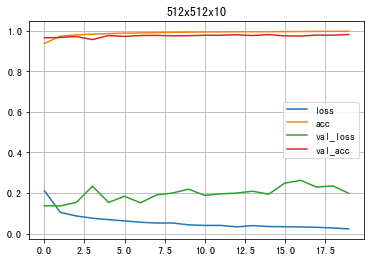

In [10]:
import os
import numpy as np
import tensorflow as tf
import keras
from keras.datasets import mnist
from keras import models,layers,optimizers

#-------加载数据-------
(x_train, y_train), (x_test, y_test) = get_datasub(6000)

#构造欠拟合模型
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(784,)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(num_class, activation='softmax'))
#打印模型
model.summary()
#编译模型
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
#模型
history = model.fit(x_train, y_train,
                    batch_size=32,
                    epochs=20,
                    verbose=1,
                    validation_split=0.2
                    )
#模型估计
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
#绘制训练曲线
draw_train_curve(history.history,'512x512x10')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_63 (Dense)             (None, 2048)              1607680   
_________________________________________________________________
dense_64 (Dense)             (None, 128)               262272    
_________________________________________________________________
dense_65 (Dense)             (None, 10)                1290      
Total params: 1,871,242
Trainable params: 1,871,242
Non-trainable params: 0
_________________________________________________________________
Train on 47089 samples, validate on 11773 samples
Epoch 1/20
47089/47089 [==============================] - 8s 169us/step - loss: 0.2178 - acc: 0.9356 - val_loss: 0.1724 - val_acc: 0.9517
Epoch 2/20
47089/47089 [==============================] - 8s 162us/step - loss: 0.1079 - acc: 0.9717 - val_loss: 0.1331 - val_acc: 0.9702
Epoch 3/20
47089/47089 [==============================] - 8s 160us/ste

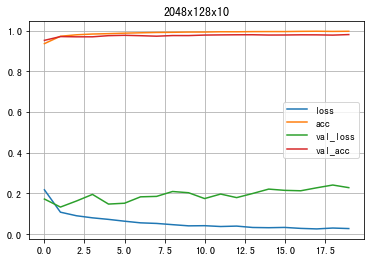

In [11]:
import os
import numpy as np
import tensorflow as tf
import keras
from keras.datasets import mnist
from keras import models,layers,optimizers

#-------加载数据-------
(x_train, y_train), (x_test, y_test) = get_datasub(6000)

#构造欠拟合模型
model = models.Sequential()
model.add(layers.Dense(2048, activation='relu', input_shape=(784,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(num_class, activation='softmax'))
#打印模型
model.summary()
#编译模型
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
#模型
history = model.fit(x_train, y_train,
                    batch_size=32,
                    epochs=20,
                    verbose=1,
                    validation_split=0.2
                    )
#模型估计
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
#绘制训练曲线
draw_train_curve(history.history,'2048x128x10')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_66 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_67 (Dense)             (None, 2048)              264192    
_________________________________________________________________
dense_68 (Dense)             (None, 10)                20490     
Total params: 385,162
Trainable params: 385,162
Non-trainable params: 0
_________________________________________________________________
Train on 47089 samples, validate on 11773 samples
Epoch 1/20
47089/47089 [==============================] - 8s 170us/step - loss: 0.2278 - acc: 0.9309 - val_loss: 0.1527 - val_acc: 0.9568
Epoch 2/20
47089/47089 [==============================] - 8s 160us/step - loss: 0.1161 - acc: 0.9695 - val_loss: 0.1732 - val_acc: 0.9604
Epoch 3/20
47089/47089 [==============================] - 8s 160us/step - 

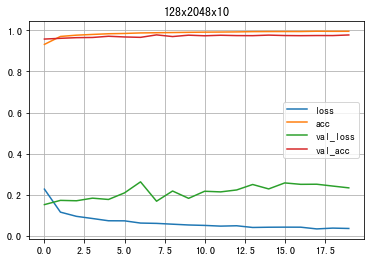

In [12]:
import os
import numpy as np
import tensorflow as tf
import keras
from keras.datasets import mnist
from keras import models,layers,optimizers

#-------加载数据-------
(x_train, y_train), (x_test, y_test) = get_datasub(6000)

#构造欠拟合模型
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(784,)))
model.add(layers.Dense(2048, activation='relu'))
model.add(layers.Dense(num_class, activation='softmax'))
#打印模型
model.summary()
#编译模型
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
#模型
history = model.fit(x_train, y_train,
                    batch_size=32,
                    epochs=20,
                    verbose=1,
                    validation_split=0.2
                    )
#模型估计
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
#绘制训练曲线
draw_train_curve(history.history,'128x2048x10')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_69 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_70 (Dense)             (None, 256)               8448      
_________________________________________________________________
dense_71 (Dense)             (None, 32)                8224      
_________________________________________________________________
dense_72 (Dense)             (None, 10)                330       
Total params: 42,122
Trainable params: 42,122
Non-trainable params: 0
_________________________________________________________________
Train on 47089 samples, validate on 11773 samples
Epoch 1/20
47089/47089 [==============================] - 9s 183us/step - loss: 0.3444 - acc: 0.8978 - val_loss: 0.1972 - val_acc: 0.9425
Epoch 2/20
47089/47089 [==============================] - 8s 173us/step - loss: 0.

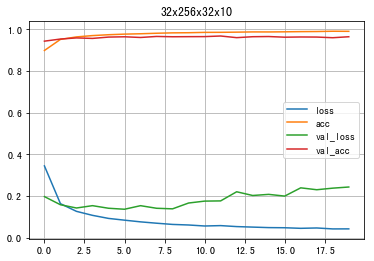

In [13]:
import os
import numpy as np
import tensorflow as tf
import keras
from keras.datasets import mnist
from keras import models,layers,optimizers

#-------加载数据-------
(x_train, y_train), (x_test, y_test) = get_datasub(6000)

#构造欠拟合模型
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(784,)))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(num_class, activation='softmax'))
#打印模型
model.summary()
#编译模型
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
#模型
history = model.fit(x_train, y_train,
                    batch_size=32,
                    epochs=20,
                    verbose=1,
                    validation_split=0.2
                    )
#模型估计
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
#绘制训练曲线
draw_train_curve(history.history,'32x256x32x10')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_73 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_74 (Dense)             (None, 16)                2064      
_________________________________________________________________
dense_75 (Dense)             (None, 128)               2176      
_________________________________________________________________
dense_76 (Dense)             (None, 10)                1290      
Total params: 106,010
Trainable params: 106,010
Non-trainable params: 0
_________________________________________________________________
Train on 47089 samples, validate on 11773 samples
Epoch 1/20
47089/47089 [==============================] - 9s 188us/step - loss: 0.3106 - acc: 0.9075 - val_loss: 0.1803 - val_acc: 0.9458
Epoch 2/20
47089/47089 [==============================] - 8s 175us/step - loss: 

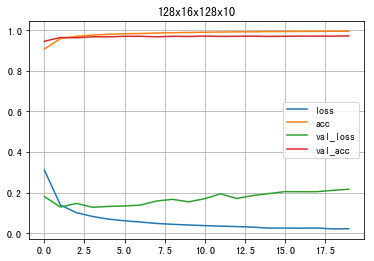

In [14]:
import os
import numpy as np
import tensorflow as tf
import keras
from keras.datasets import mnist
from keras import models,layers,optimizers

#-------加载数据-------
(x_train, y_train), (x_test, y_test) = get_datasub(6000)

#构造欠拟合模型
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(784,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(num_class, activation='softmax'))
#打印模型
model.summary()
#编译模型
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
#模型
history = model.fit(x_train, y_train,
                    batch_size=32,
                    epochs=20,
                    verbose=1,
                    validation_split=0.2
                    )
#模型估计
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
#绘制训练曲线
draw_train_curve(history.history,'128x16x128x10')

# 贝叶斯调参
#### 层序号的约定
    数据输入层序号为0
    第一个隐层为1,第二个为2，。。。,最后一层为输出层
#### 调试参数结构说明
    每层有三个参数可调：激活函数，神经元数目，dropout
    全局参数：优化方法，批大小
    先固定网络层数N，设置各层可调参数范围

In [22]:
import os
import numpy as np
import tensorflow as tf
import keras
from keras.datasets import mnist
from keras import models,layers,optimizers
from bayes_opt import BayesianOptimization

#----------加载数据-----------
num_class=10            #分类数目
(x_train, y_train), (x_test, y_test) = get_datasub(6000)

#----------调试参数-----------    
#生成调试参数
def create_params(layer_num):
    param={}
    for layer_index in range(1,layer_num+1):
        param['layers']=(layer_num,layer_num+0.5)  #网络层数
        param['filters%d'%(layer_index)]=(6,11.5) #2^n
        #param['dropout%d'%(layer_index)]=(0,4)    #1.1*n
    #param['optimizer']=(0,2.9)                     #
    #param['batchsize']=(4,6)                      #2^n
    return param

#获取第index层的参数:act,filter_num,drop_out
def get_param(index,**args):
    filter_num=2**int(args['filters%d'%(index)])
    #drop_out=0.2*int(args['dropout%d'%(index)])
    return filter_num

#----------模型创建-----------
def build_model(**args):
    #print(args)
    layer_num=int(args['layers'])
    #opts={0:optimizers.SGD(),1:optimizers.RMSprop(),2:optimizers.Adagrad()}
    #opt=opts[int(args['optimizer'])]
    #batch_size=2**int(args['batchsize'])
    model = models.Sequential()
    for i in range(1,layer_num+1):
        filter_num=get_param(i,**args)
        if i==1:
            model.add(layers.Dense(filter_num, activation='relu',name='Dense_%d'%(i), input_shape=(784,)))
        else:
            model.add(layers.Dense(filter_num, activation='relu',name='Dense_%d'%(i)))
        model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_class, activation='softmax'))
    #打印模型
    #model.summary()
    #编译模型
    model.compile(loss='categorical_crossentropy',
                  optimizer=optimizers.RMSprop(),
                  metrics=['accuracy'])
    return model

#----------模型训练-----------
def train_model(model,batch_size):
    #print('x_train.shape:',x_train.shape)
    #print('y_train.shape:',y_train.shape)
    history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=20,
                    verbose=0,
                    validation_split=0.2
                    )   
    return history

#----------模型测试-----------
def pred_model(model):
    score = model.evaluate(x_test, y_test, verbose=0)
    #print('Test loss:', score[0])
    #print('Test accuracy:', score[1])    
    return score[1]
    
#----------优化函数-----------
#模型优化函数
def opt_model(**args):  

    #batch_size=2**int(args['batchsize'])
    batch_size=32
    model=build_model(**args)
    train_model(model,batch_size)
    acc=pred_model(model)
    return acc

#----------分层优化-----------
def do_opt_model(layers_from,layers_to):
    #定义优化函数
    black_box_function=opt_model
    for i in range(layers_from,layers_to+1):
        print('= =======Index:%d======='%(i))
        #定义优化参数
        pbounds=create_params(i)
        print(pbounds)
        #构建优化器
        optimizer = BayesianOptimization(
            f=black_box_function,
            pbounds=pbounds,
            verbose=2, # verbose = 1 prints only when a maximum is observed, verbose = 0 is silent
            random_state=1,
        )
        #优化
        optimizer.maximize(
            init_points=2,
            n_iter=10,
        )
        #最优结果
        print('==========max=========')
        print(optimizer.max)

In [23]:
#参数优化
layers_num=10 #调试最大层数:固定层数，调试优化固定层的各子层参数
do_opt_model(3,6) 

= =======Index:3=======
{'layers': (3, 3.5), 'filters2': (6, 11.5), 'filters3': (6, 11.5), 'filters1': (6, 11.5)}
|   iter    |  target   | filters1  | filters2  | filters3  |  layers   |
-------------------------------------------------------------------------
|  1        |  0.9664   |  8.294    |  9.962    |  6.001    |  3.151    |
|  2        |  0.9477   |  6.807    |  6.508    |  7.024    |  3.173    |
|  3        |  0.9533   |  11.5     |  11.5     |  11.5     |  3.5      |
|  4        |  0.9295   |  6.0      |  11.5     |  6.0      |  3.5      |
|  5        |  0.9464   |  11.5     |  6.0      |  6.0      |  3.5      |
|  6        |  0.963    |  11.5     |  6.0      |  11.5     |  3.0      |
|  7        |  0.9564   |  11.5     |  11.5     |  6.0      |  3.0      |
|  8        |  0.9442   |  6.0      |  11.5     |  11.5     |  3.0      |
|  9        |  0.9672   |  8.27     |  7.899    |  11.5     |  3.5      |
|  10       |  0.9706   |  10.01    |  8.833    |  9.317    |  3.009    

|  6        |  0.65     |  11.5     |  6.0      |  6.0      |  11.5     |  11.5     |  6.0      |  6.0      |
|  7        |  0.894    |  6.0      |  11.5     |  6.0      |  11.5     |  11.5     |  11.5     |  6.5      |
|  8        |  0.736    |  6.0      |  6.0      |  11.5     |  11.5     |  6.0      |  6.0      |  6.0      |
|  9        |  0.9151   |  6.0      |  11.5     |  6.0      |  6.0      |  11.5     |  6.0      |  6.0      |
|  10       |  0.8999   |  6.0      |  11.5     |  6.0      |  11.5     |  6.0      |  6.0      |  6.5      |
|  11       |  0.6327   |  11.5     |  11.5     |  6.0      |  6.0      |  11.5     |  11.5     |  6.5      |
|  12       |  0.8754   |  6.0      |  6.0      |  11.5     |  11.5     |  11.5     |  11.5     |  6.0      |
==========max=========
{'params': {'filters5': 6.8071573994941215, 'layers': 6.093130105688836, 'filters3': 6.000629061495397, 'filters1': 8.293621025864157, 'filters4': 7.662829149475119, 'filters6': 6.507862271228388, 'filters2'

# 调试部分结果
{'dropout1': (0, 4), 'layers': (1, 1.5), 'optimizer': (0, 2.9), 'filters1': (5, 10)}
|   iter    |  target   | dropout1  | filters1  |  layers   | optimizer |
- ------------------------------------------------------------------------
|  1        |  0.9643   |  1.668    |  8.602    |  1.0      |  0.8768   |
|  2        |  0.9654   |  0.587    |  5.462    |  1.093    |  1.002    |
|  3        |  0.9238   |  3.933    |  5.025    |  1.336    |  2.894    |
|  4        |  0.9816   |  0.0      |  10.0     |  1.5      |  2.9      |
|  5        |  0.9649   |  0.07832  |  9.905    |  1.427    |  0.0294   |
|  6        |  0.9812   |  0.0      |  10.0     |  1.0      |  2.9      |
|  7        |  0.9725   |  0.03622  |  7.112    |  1.065    |  2.897    |
|  8        |  0.9775   |  3.857    |  10.0     |  1.34     |  2.9      |
|  9        |  0.9659   |  3.984    |  9.947    |  1.11     |  0.02509  |
|  10       |  0.9801   |  1.682    |  10.0     |  1.0      |  2.9      |
|  11       |  0.9824   |  8.048e-0 |  10.0     |  1.5      |  2.9      |
|  12       |  0.9802   |  0.9916   |  9.984    |  1.439    |  2.885    |
|  13       |  0.9796   |  0.002649 |  9.932    |  1.163    |  2.832    |
|  14       |  0.9806   |  0.1512   |  9.994    |  1.012    |  2.892    |
|  15       |  0.9804   |  1.347    |  9.997    |  1.466    |  2.795    |
|  16       |  0.9498   |  0.0      |  5.0      |  1.5      |  0.0      |
|  17       |  0.9545   |  0.1328   |  5.009    |  1.025    |  2.669    |
|  18       |  0.9295   |  3.738    |  5.053    |  1.001    |  0.04394  |
|  19       |  0.9803   |  0.08037  |  9.999    |  1.475    |  1.835    |
|  20       |  0.9796   |  3.933    |  9.984    |  1.016    |  1.888    |
|  21       |  0.9802   |  2.855    |  9.987    |  1.485    |  2.053    |
|  22       |  0.9766   |  3.989    |  9.949    |  1.491    |  1.613    |
|  23       |  0.9812   |  0.1086   |  9.983    |  1.021    |  2.072    |
|  24       |  0.9809   |  0.07859  |  9.989    |  1.444    |  2.471    |
|  25       |  0.9791   |  2.441    |  9.983    |  1.015    |  2.247    |
|  26       |  0.981    |  0.05597  |  9.982    |  1.484    |  2.58     |
|  27       |  0.9792   |  0.01015  |  8.858    |  1.023    |  2.14     |
|  28       |  0.9806   |  0.001296 |  9.984    |  1.432    |  2.191    |
|  29       |  0.9797   |  0.05782  |  9.995    |  1.062    |  1.966    |
|  30       |  0.9807   |  0.1305   |  9.993    |  1.474    |  2.816    |
|  31       |  0.9802   |  0.3401   |  9.988    |  1.496    |  2.511    |
|  32       |  0.9743   |  0.0157   |  7.248    |  1.003    |  1.411    |
|  33       |  0.9802   |  0.02443  |  9.997    |  1.425    |  2.808    |
|  34       |  0.9811   |  0.07663  |  9.996    |  1.055    |  2.498    |
|  35       |  0.9806   |  0.0307   |  9.978    |  1.487    |  2.402    |
|  36       |  0.9814   |  0.004828 |  9.994    |  1.059    |  2.19     |
|  37       |  0.9818   |  0.01512  |  9.956    |  1.02     |  2.849    |
|  38       |  0.9801   |  0.5264   |  9.993    |  1.01     |  2.325    |
|  39       |  0.9798   |  2.818    |  9.998    |  1.486    |  2.685    |
|  40       |  0.9804   |  0.01815  |  9.978    |  1.092    |  2.86     |
|  41       |  0.9807   |  0.09989  |  9.99     |  1.028    |  2.623    |
|  42       |  0.9802   |  0.02305  |  9.98     |  1.031    |  2.441    |
|  43       |  0.9802   |  0.00962  |  9.994    |  1.417    |  2.692    |
|  44       |  0.9777   |  3.254    |  9.997    |  1.022    |  2.596    |
|  45       |  0.981    |  1.503    |  9.989    |  1.499    |  2.687    |
|  46       |  0.9805   |  1.083    |  9.999    |  1.318    |  2.378    |
|  47       |  0.981    |  0.6967   |  9.997    |  1.493    |  2.398    |
|  48       |  0.9809   |  1.074    |  9.994    |  1.495    |  2.679    |
|  49       |  0.9797   |  0.01654  |  9.999    |  1.051    |  2.362    |
|  50       |  0.98     |  0.009107 |  9.954    |  1.469    |  2.816    |
|  51       |  0.9813   |  1.133    |  9.991    |  1.489    |  2.233    |
|  52       |  0.9803   |  0.6046   |  9.989    |  1.49     |  2.578    |
|  53       |  0.9806   |  1.453    |  9.998    |  1.488    |  2.659    |
|  54       |  0.9811   |  1.606    |  10.0     |  1.495    |  2.491    |
|  55       |  0.9807   |  0.6637   |  9.996    |  1.472    |  2.417    |
|  56       |  0.9807   |  0.000674 |  9.986    |  1.009    |  2.479    |
|  57       |  0.9801   |  1.375    |  9.994    |  1.494    |  2.387    |
|  58       |  0.9806   |  0.02319  |  9.986    |  1.457    |  2.407    |
|  59       |  0.9789   |  0.01026  |  9.977    |  1.023    |  2.761    |
|  60       |  0.9806   |  0.1324   |  9.996    |  1.492    |  2.421    |
|  61       |  0.9805   |  1.086    |  9.997    |  1.482    |  2.514    |
|  62       |  0.9803   |  0.2304   |  9.999    |  1.473    |  2.782    |
= ========================================================================
= =========max=========
{'params': {'dropout1': 8.047638014496802e-08, 'layers': 1.5, 'optimizer': 2.8999999982964457, 'filters1': 10.0}, 'target': 0.9824}
{'dropout2': (0, 4), 'optimizer': (0, 2.9), 'filters1': (5, 10), 'dropout1': (0, 4), 'layers': (2, 2.5), 'filters2': (5, 10)}
|   iter    |  target   | dropout1  | dropout2  | filters1  | filters2  |  layers   | optimizer |
- ------------------------------------------------------------------------------------------------

|  1        |  0.9512   |  1.668    |  2.881    |  5.001    |  6.512    |  2.073    |  0.2678   |
|  2        |  0.973    |  0.745    |  1.382    |  6.984    |  7.694    |  2.21     |  1.987    |
|  3        |  0.9744   |  4.0      |  4.0      |  10.0     |  10.0     |  2.5      |  2.9      |
|  4        |  0.9757   |  4.0      |  1.11e-16 |  10.0     |  5.0      |  2.5      |  2.9      |
|  5        |  0.9744   |  0.2484   |  0.3134   |  9.87     |  9.837    |  2.44     |  0.04895  |
|  6        |  0.9787   |  0.0      |  4.0      |  10.0     |  5.274    |  2.492    |  2.9      |
|  7        |  0.9822   |  0.1685   |  0.001101 |  9.967    |  9.185    |  2.315    |  2.859    |
|  8        |  0.9713   |  0.0      |  0.0      |  5.649    |  10.0     |  2.5      |  2.9      |
|  9        |  0.9805   |  0.5693   |  0.01909  |  9.979    |  5.075    |  2.004    |  2.777    |
|  10       |  0.9821   |  0.04169  |  3.845    |  9.352    |  9.884    |  2.056    |  2.83     |
|  11       |  0.9826   |  3.387    |  0.4674   |  9.984    |  9.683    |  2.078    |  2.897    |
|  12       |  0.9819   |  0.06654  |  0.07687  |  9.932    |  9.688    |  2.003    |  2.831    |
|  13       |  0.9813   |  0.4126   |  2.819    |  9.957    |  7.877    |  2.004    |  2.842    |
|  14       |  0.984    |  1.559    |  1.437    |  9.921    |  9.65     |  2.495    |  2.842    |
|  15       |  0.9815   |  0.08605  |  1.828    |  9.83     |  9.732    |  2.402    |  2.866    |
|  16       |  0.9832   |  1.383    |  0.02054  |  9.676    |  9.993    |  2.031    |  2.782    |
|  17       |  0.9838   |  1.432    |  0.5291   |  9.976    |  8.982    |  2.479    |  2.856    |
|  18       |  0.9784   |  3.825    |  0.000881 |  8.298    |  9.994    |  2.357    |  2.899    |
|  19       |  0.9831   |  1.1      |  0.4337   |  9.984    |  8.448    |  2.49     |  2.881    |
|  20       |  0.9808   |  3.342    |  0.1205   |  9.978    |  9.767    |  2.456    |  2.886    |
|  21       |  0.9835   |  1.152    |  2.069    |  9.956    |  9.249    |  2.008    |  2.887    |
|  22       |  0.9814   |  1.124    |  2.129    |  9.985    |  9.684    |  2.08     |  2.854    |
|  23       |  0.9819   |  0.08759  |  0.2448   |  9.955    |  7.566    |  2.081    |  2.895    |
|  24       |  0.9824   |  1.042    |  0.01252  |  9.971    |  9.938    |  2.057    |  2.851    |
|  25       |  0.9816   |  0.8235   |  0.9897   |  9.978    |  8.208    |  2.047    |  2.86     |
|  26       |  0.9824   |  1.389    |  1.169    |  9.734    |  9.962    |  2.479    |  2.883    |
|  27       |  0.9819   |  2.121    |  0.03913  |  9.961    |  8.842    |  2.041    |  2.9      |
|  28       |  0.9831   |  0.05649  |  3.394    |  9.884    |  9.512    |  2.335    |  2.809    |
|  29       |  0.9805   |  0.06312  |  2.274    |  9.947    |  9.854    |  2.072    |  2.884    |
|  30       |  0.9817   |  0.744    |  0.2419   |  9.855    |  7.534    |  2.41     |  2.889    |
|  31       |  0.9826   |  0.2295   |  1.318    |  9.912    |  9.802    |  2.432    |  2.864    |
|  32       |  0.9834   |  1.108    |  0.4995   |  9.957    |  9.716    |  2.406    |  2.882    |
|  33       |  0.9813   |  1.952    |  0.19     |  9.933    |  9.846    |  2.468    |  2.835    |
|  34       |  0.9816   |  0.3038   |  0.8497   |  10.0     |  9.023    |  2.437    |  2.893    |
|  35       |  0.9829   |  0.08988  |  3.973    |  9.752    |  9.674    |  2.438    |  2.69     |
|  36       |  0.9832   |  0.7477   |  3.831    |  9.977    |  9.643    |  2.484    |  2.775    |
|  37       |  0.9831   |  0.4619   |  3.918    |  9.914    |  9.824    |  2.358    |  2.641    |
|  38       |  0.9814   |  0.000316 |  3.479    |  9.812    |  9.773    |  2.083    |  2.886    |
|  39       |  0.9827   |  1.855    |  0.1104   |  9.942    |  9.665    |  2.085    |  2.827    |
|  40       |  0.983    |  0.04736  |  3.997    |  9.768    |  9.956    |  2.318    |  2.729    |
|  41       |  0.9821   |  0.4147   |  3.971    |  9.969    |  9.776    |  2.32     |  2.854    |
|  42       |  0.9804   |  0.3362   |  3.96     |  9.977    |  8.721    |  2.464    |  2.828    |
|  43       |  0.9821   |  0.2492   |  3.983    |  8.658    |  9.925    |  2.351    |  2.863    |
|  44       |  0.9822   |  1.275    |  0.5019   |  9.861    |  9.998    |  2.478    |  2.839    |
|  45       |  0.9821   |  0.3225   |  2.456    |  9.777    |  9.769    |  2.46     |  2.886    |
|  46       |  0.9838   |  1.425    |  0.151    |  9.989    |  9.579    |  2.286    |  2.847    |
|  47       |  0.9827   |  1.855    |  0.05682  |  9.899    |  8.883    |  2.155    |  2.872    |
|  48       |  0.9838   |  1.278    |  0.05305  |  9.82     |  8.468    |  2.324    |  2.888    |
|  49       |  0.9825   |  1.632    |  0.1495   |  9.906    |  8.277    |  2.14     |  2.892    |
|  50       |  0.9816   |  1.556    |  0.1947   |  9.924    |  8.883    |  2.119    |  2.899    |
|  51       |  0.9821   |  0.7903   |  1.419    |  9.829    |  9.994    |  2.363    |  2.889    |

|  52       |  0.983    |  1.625    |  0.1214   |  9.939    |  8.191    |  2.364    |  2.864    |
|  53       |  0.9825   |  1.322    |  0.1007   |  9.882    |  9.873    |  2.478    |  2.866    |
|  54       |  0.983    |  0.8123   |  0.09478  |  9.793    |  8.645    |  2.345    |  2.883    |
|  55       |  0.9839   |  1.503    |  0.5587   |  9.826    |  9.875    |  2.468    |  2.869    |
|  56       |  0.9823   |  0.03564  |  3.448    |  9.989    |  9.802    |  2.499    |  2.872    |
|  57       |  0.9802   |  0.9646   |  0.02772  |  9.979    |  6.944    |  2.327    |  2.89     |
|  58       |  0.9838   |  1.254    |  0.1318   |  9.817    |  9.806    |  2.149    |  2.868    |
|  59       |  0.983    |  1.71     |  0.06461  |  9.941    |  8.95     |  2.061    |  2.886    |
|  60       |  0.9832   |  1.895    |  0.01315  |  9.78     |  9.981    |  2.385    |  2.861    |
|  61       |  0.9823   |  1.854    |  0.07017  |  9.926    |  9.754    |  2.317    |  2.81     |
|  62       |  0.9828   |  2.516    |  0.02988  |  9.933    |  9.689    |  2.445    |  2.898    |
= ================================================================================================
= =========max=========
{'params': {'dropout2': 1.437475533796488, 'optimizer': 2.8420153460527198, 'filters1': 9.921328196846584, 'dropout1': 1.5586618388007842, 'layers': 2.4950555136103194, 'filters2': 9.65046304085101}, 'target': 0.984}
{'dropout2': (0, 4), 'dropout3': (0, 4), 'optimizer': (0, 2.9), 'filters3': (5, 10), 'filters1': (5, 10), 'dropout1': (0, 4), 'layers': (3, 3.5), 'filters2': (5, 10)}
|   iter    |  target   | dropout1  | dropout2  | dropout3  | filters1  | filters2  | filters3  |  layers   | optimizer |
-  ---------------------------------------------------------------------------------------------------------
|  1        |  0.9663   |  1.668    |  2.881    |  0.000457 |  6.512    |  5.734    |  5.462    |  3.093    |  1.002    |
|  2        |  0.9734   |  1.587    |  2.155    |  1.677    |  8.426    |  6.022    |  9.391    |  3.014    |  1.944    |
|  3        |  0.9219   |  3.959    |  1.007    |  3.86     |  5.002    |  9.968    |  9.795    |  3.023    |  0.5923   |
|  4        |  0.8854   |  0.0      |  0.0      |  4.0      |  10.0     |  5.0      |  5.0      |  3.5      |  2.9      |
|  5        |  0.9771   |  0.0      |  4.0      |  0.0      |  10.0     |  10.0     |  10.0     |  3.5      |  0.0      |
|  6        |  0.4775   |  0.0      |  4.0      |  0.0      |  5.0      |  5.0      |  10.0     |  3.5      |  2.9      |
|  7        |  0.9794   |  4.0      |  0.0      |  0.0      |  10.0     |  10.0     |  5.0      |  3.0      |  2.9      |
|  8        |  0.7      |  4.0      |  4.0      |  4.0      |  10.0     |  5.0      |  5.0      |  3.0      |  0.0      |
|  9        |  0.9742   |  4.0      |  0.0      |  0.0      |  10.0     |  5.0      |  10.0     |  3.5      |  0.0      |
|  10       |  0.9665   |  0.0      |  0.0      |  0.0      |  5.0      |  10.0     |  5.0      |  3.0      |  0.0      |
|  11       |  0.9788   |  0.0      |  0.0      |  4.0      |  10.0     |  10.0     |  10.0     |  3.0      |  0.0      |
|  12       |  0.9767   |  0.0      |  0.0      |  0.0      |  10.0     |  5.0      |  5.0      |  3.0      |  0.0      |
|  13       |  0.853    |  4.0      |  0.0      |  0.0      |  5.0      |  5.0      |  5.0      |  3.0      |  2.9      |
|  14       |  0.9822   |  0.0      |  4.0      |  0.0      |  10.0     |  10.0     |  5.0      |  3.0      |  2.9      |
|  15       |  0.0982   |  4.0      |  0.0      |  0.0      |  10.0     |  10.0     |  10.0     |  3.0      |  2.9      |
|  16       |  0.9404   |  0.0      |  4.0      |  4.0      |  5.0      |  10.0     |  5.0      |  3.5      |  0.0      |
|  17       |  0.9361   |  3.776    |  0.04639  |  3.512    |  6.118    |  5.808    |  9.304    |  3.386    |  1.692    |
|  18       |  0.7798   |  0.0      |  4.0      |  4.0      |  10.0     |  5.0      |  10.0     |  3.5      |  0.0      |
|  19       |  0.9151   |  4.0      |  0.0      |  4.0      |  7.897    |  10.0     |  5.0      |  3.5      |  0.0   


= =======Index:3=======
{'layers': (3, 3.5), 'filters2': (6, 11.5), 'filters3': (6, 11.5), 'filters1': (6, 11.5)}
|   iter    |  target   | filters1  | filters2  | filters3  |  layers   |
- ------------------------------------------------------------------------
|  1        |  0.9664   |  8.294    |  9.962    |  6.001    |  3.151    |
|  2        |  0.9477   |  6.807    |  6.508    |  7.024    |  3.173    |
|  3        |  0.9533   |  11.5     |  11.5     |  11.5     |  3.5      |
|  4        |  0.9295   |  6.0      |  11.5     |  6.0      |  3.5      |
|  5        |  0.9464   |  11.5     |  6.0      |  6.0      |  3.5      |
|  6        |  0.963    |  11.5     |  6.0      |  11.5     |  3.0      |
|  7        |  0.9564   |  11.5     |  11.5     |  6.0      |  3.0      |
|  8        |  0.9442   |  6.0      |  11.5     |  11.5     |  3.0      |
|  9        |  0.9672   |  8.27     |  7.899    |  11.5     |  3.5      |
|  10       |  0.9706   |  10.01    |  8.833    |  9.317    |  3.009    |
|  11       |  0.9657   |  9.809    |  8.674    |  11.45    |  3.014    |
|  12       |  0.9643   |  8.5      |  6.042    |  11.36    |  3.024    |
= ========================================================================
= =========max=========
{'params': {'layers': 3.0085208401900663, 'filters2': 8.833139950654477, 'filters3': 9.316692187005286, 'filters1': 10.012904657079671}, 'target': 0.9706}
= =======Index:4=======
{'filters4': (6, 11.5), 'layers': (4, 4.5), 'filters2': (6, 11.5), 'filters3': (6, 11.5), 'filters1': (6, 11.5)}
|   iter    |  target   | filters1  | filters2  | filters3  | filters4  |  layers   |
- ------------------------------------------------------------------------------------
|  1        |  0.963    |  8.294    |  9.962    |  6.001    |  7.663    |  4.073    |
|  2        |  0.9386   |  6.508    |  7.024    |  7.901    |  8.182    |  4.269    |
|  3        |  0.9302   |  11.5     |  11.5     |  11.5     |  11.5     |  4.5      |
|  4        |  0.9522   |  11.5     |  6.0      |  6.0      |  6.0      |  4.0      |
|  5        |  0.8949   |  6.0      |  11.5     |  11.5     |  6.0      |  4.0      |
|  6        |  0.9351   |  11.5     |  11.5     |  6.0      |  11.5     |  4.5      |
|  7        |  0.911    |  6.0      |  11.5     |  6.0      |  11.5     |  4.0      |
|  8        |  0.9323   |  11.5     |  11.5     |  6.0      |  6.0      |  4.5      |
|  9        |  0.9511   |  11.5     |  6.0      |  11.5     |  11.5     |  4.0      |
|  10       |  0.9484   |  11.5     |  6.0      |  6.0      |  11.5     |  4.0      |
|  11       |  0.9339   |  6.0      |  6.0      |  6.0      |  6.0      |  4.0      |
|  12       |  0.8174   |  11.5     |  7.228    |  11.5     |  6.0      |  4.0      |
= ====================================================================================
= =========max=========
{'params': {'filters4': 7.662829149475119, 'layers': 4.073377945408557, 'filters2': 9.96178471393187, 'filters3': 6.000629061495397, 'filters1': 8.293621025864157}, 'target': 0.963}
= =======Index:5=======
{'filters5': (6, 11.5), 'filters3': (6, 11.5), 'filters1': (6, 11.5), 'filters4': (6, 11.5), 'layers': (5, 5.5), 'filters2': (6, 11.5)}
|   iter    |  target   | filters1  | filters2  | filters3  | filters4  | filters5  |  layers   |
- ------------------------------------------------------------------------------------------------
|  1        |  0.9544   |  8.294    |  9.962    |  6.001    |  7.663    |  6.807    |  5.046    |
|  2        |  0.9462   |  7.024    |  7.901    |  8.182    |  8.963    |  8.306    |  5.343    |
|  3        |  0.8886   |  11.5     |  11.5     |  11.5     |  6.0      |  6.0      |  5.0      |
|  4        |  0.8102   |  11.5     |  6.0      |  6.0      |  11.5     |  11.5     |  5.0      |
|  5        |  0.9254   |  6.0      |  11.5     |  6.0      |  6.0      |  11.5     |  5.5      |
|  6        |  0.885    |  6.0      |  11.5     |  11.5     |  11.5     |  6.0      |  5.0      |
|  7        |  0.8915   |  6.0      |  6.0      |  6.0      |  6.0      |  6.0      |  5.0      |
|  8        |  0.8967   |  6.0      |  11.5     |  6.0      |  11.5     |  6.0      |  5.5      |
|  9        |  0.9041   |  6.0      |  6.0      |  11.5     |  6.0      |  11.5     |  5.0      |
|  10       |  0.816    |  11.5     |  6.0      |  11.5     |  11.5     |  6.0      |  5.5      |
|  11       |  0.8952   |  6.0      |  11.5     |  9.964    |  6.0      |  6.0      |  5.5      |
|  12       |  0.9369   |  10.25    |  11.5     |  11.5     |  11.5     |  11.5     |  5.5      |
= ================================================================================================
= =========max=========
{'params': {'filters5': 6.8071573994941215, 'filters3': 6.000629061495397, 'filters1': 8.293621025864157, 'filters4': 7.662829149475119, 'layers': 5.046169297384399, 'filters2': 9.96178471393187}, 'target': 0.9544}
= =======Index:6=======
{'filters5': (6, 11.5), 'filters3': (6, 11.5), 'filters1': (6, 11.5), 'filters4': (6, 11.5), 'filters6': (6, 11.5), 'layers': (6, 6.5), 'filters2': (6, 11.5)}
|   iter    |  target   | filters1  | filters2  | filters3  | filters4  | filters5  | filters6  |  layers   |
- ------------------------------------------------------------------------------------------------------------
|  1        |  0.9578   |  8.294    |  9.962    |  6.001    |  7.663    |  6.807    |  6.508    |  6.093    |
|  2        |  0.9343   |  7.901    |  8.182    |  8.963    |  8.306    |  9.769    |  7.124    |  6.439    |
|  3        |  0.923    |  11.5     |  11.5     |  6.0      |  11.5     |  6.0      |  11.5     |  6.0      |
|  4        |  0.7761   |  6.0      |  6.0      |  6.0      |  6.0      |  6.0      |  11.5     |  6.0      |
|  5        |  0.3792   |  11.5     |  11.5     |  11.5     |  6.0      |  6.0      |  6.0      |  6.5      |

|  6        |  0.65     |  11.5     |  6.0      |  6.0      |  11.5     |  11.5     |  6.0      |  6.0      |
|  7        |  0.894    |  6.0      |  11.5     |  6.0      |  11.5     |  11.5     |  11.5     |  6.5      |
|  8        |  0.736    |  6.0      |  6.0      |  11.5     |  11.5     |  6.0      |  6.0      |  6.0      |
|  9        |  0.9151   |  6.0      |  11.5     |  6.0      |  6.0      |  11.5     |  6.0      |  6.0      |
|  10       |  0.8999   |  6.0      |  11.5     |  6.0      |  11.5     |  6.0      |  6.0      |  6.5      |
|  11       |  0.6327   |  11.5     |  11.5     |  6.0      |  6.0      |  11.5     |  11.5     |  6.5      |
|  12       |  0.8754   |  6.0      |  6.0      |  11.5     |  11.5     |  11.5     |  11.5     |  6.0      |
= ============================================================================================================
= =========max=========
{'params': {'filters5': 6.8071573994941215, 'layers': 6.093130105688836, 'filters3': 6.000629061495397, 'filters1': 8.293621025864157, 'filters4': 7.662829149475119, 'filters6': 6.507862271228388, 'filters2': 9.96178471393187}, 'target': 0.9578}
